In [1]:
import numpy as np
import tensorflow as tf
import random

SEED = 2025
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

X, y = np.load("data/Nasdaq100_stocks.npy"), np.load("data/Nasdaq100_index.npy")

In [2]:
X.shape, y.shape

((1510, 98), (1510,))

In [3]:
X_min = np.min(X, axis = 0)
X_max = np.max(X, axis = 0)
X = (X - X_min)/(X_max - X_min)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Model

In [5]:
from keras import Model, Input
from keras.layers import Dense
from keras import activations, losses
from keras.optimizers import Adam

In [6]:
n_feature = X.shape[1]

# Encodeur
x1 = Input(shape = (n_feature, ))
x2 = Dense(int(n_feature/2), activation = activations.relu)(x1)
x3 = Dense(int(n_feature/4), activation = activations.relu)(x2)
encodeur = Model(inputs = x1, outputs = x3)

# Decodeur
x4 = Input(shape = (int(n_feature/4), ))
x5 = Dense(int(n_feature/2), activation = activations.relu)(x4)
x6 = Dense(n_feature, activation = activations.sigmoid)(x5)
decodeur = Model(inputs = x4, outputs = x6)

# Autoencodeur
autoencodeur = Model(inputs = x1, outputs = decodeur(x3))

In [7]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [8]:
autoencodeur.compile(optimizer=Adam(learning_rate=0.001), loss=losses.mean_squared_error)
history = autoencodeur.fit(x=X_train, y=X_train, batch_size=256, epochs=100, validation_split = 0.2, verbose=1, callbacks=[checkpoint])

Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - loss: 0.0841
Epoch 1: val_loss improved from None to 0.07444, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0812 - val_loss: 0.0744
Epoch 2/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0802
Epoch 2: val_loss improved from 0.07444 to 0.07305, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0785 - val_loss: 0.0730
Epoch 3/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0789
Epoch 3: val_loss improved from 0.07305 to 0.07191, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0772 - val_loss: 0.0719
Epoch 4/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0777
Epoch 4: val_loss improved from 0.07191 to 0.07064, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0761 - val_loss: 0.0706
Epoch 5/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0765
Epoch 5: val_loss improved from 0.07064 to 0.06887, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0747 - val_loss: 0.0689
Epoch 6/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0747
Epoch 6: val_loss improved from 0.06887 to 0.06646, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0727 - val_loss: 0.0665
Epoch 7/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0722
Epoch 7: val_loss improved from 0.06646 to 0.06333, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0701 - val_loss: 0.0633
Epoch 8/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0691
Epoch 8: val_loss improved from 0.06333 to 0.05950, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0667 - val_loss: 0.0595
Epoch 9/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0652
Epoch 9: val_loss improved from 0.05950 to 0.05485, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0626 - val_loss: 0.0549
Epoch 10/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0604
Epoch 10: val_loss improved from 0.05485 to 0.04947, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0576 - val_loss: 0.0495
Epoch 11/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0549
Epoch 11: val_loss improved from 0.04947 to 0.04354, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0519 - val_loss: 0.0435
Epoch 12/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0487
Epoch 12: val_loss improved from 0.04354 to 0.03770, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0458 - val_loss: 0.0377
Epoch 13/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0425
Epoch 13: val_loss improved from 0.03770 to 0.03244, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0398 - val_loss: 0.0324
Epoch 14/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0368
Epoch 14: val_loss improved from 0.03244 to 0.02830, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0346 - val_loss: 0.0283
Epoch 15/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0322
Epoch 15: val_loss improved from 0.02830 to 0.02533, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0305 - val_loss: 0.0253
Epoch 16/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0287
Epoch 16: val_loss improved from 0.02533 to 0.02320, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0275 - val_loss: 0.0232
Epoch 17/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0262
Epoch 17: val_loss improved from 0.02320 to 0.02150, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0253 - val_loss: 0.0215
Epoch 18/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0241
Epoch 18: val_loss improved from 0.02150 to 0.01993, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0235 - val_loss: 0.0199
Epoch 19/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0223
Epoch 19: val_loss improved from 0.01993 to 0.01845, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0218 - val_loss: 0.0184
Epoch 20/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0206
Epoch 20: val_loss improved from 0.01845 to 0.01705, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0202 - val_loss: 0.0171
Epoch 21/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0191
Epoch 21: val_loss improved from 0.01705 to 0.01574, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0187 - val_loss: 0.0157
Epoch 22/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0176
Epoch 22: val_loss improved from 0.01574 to 0.01455, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0173 - val_loss: 0.0145
Epoch 23/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0162
Epoch 23: val_loss improved from 0.01455 to 0.01350, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0160 - val_loss: 0.0135
Epoch 24/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0150
Epoch 24: val_loss improved from 0.01350 to 0.01259, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0148 - val_loss: 0.0126
Epoch 25/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0139
Epoch 25: val_loss improved from 0.01259 to 0.01182, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0138 - val_loss: 0.0118
Epoch 26/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129
Epoch 26: val_loss improved from 0.01182 to 0.01117, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0129 - val_loss: 0.0112
Epoch 27/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0121
Epoch 27: val_loss improved from 0.01117 to 0.01062, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0122 - val_loss: 0.0106
Epoch 28/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114
Epoch 28: val_loss improved from 0.01062 to 0.01015, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0115 - val_loss: 0.0102
Epoch 29/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109
Epoch 29: val_loss improved from 0.01015 to 0.00975, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 30/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104
Epoch 30: val_loss improved from 0.00975 to 0.00939, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 31/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0099
Epoch 31: val_loss improved from 0.00939 to 0.00905, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 32/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0095
Epoch 32: val_loss improved from 0.00905 to 0.00873, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 33/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092
Epoch 33: val_loss improved from 0.00873 to 0.00844, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 34/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088
Epoch 34: val_loss improved from 0.00844 to 0.00816, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0089 - val_loss: 0.0082
Epoch 35/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085
Epoch 35: val_loss improved from 0.00816 to 0.00789, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0086 - val_loss: 0.0079
Epoch 36/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082
Epoch 36: val_loss improved from 0.00789 to 0.00764, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 37/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0080
Epoch 37: val_loss improved from 0.00764 to 0.00739, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 38/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0077
Epoch 38: val_loss improved from 0.00739 to 0.00716, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0077 - val_loss: 0.0072
Epoch 39/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0075
Epoch 39: val_loss improved from 0.00716 to 0.00693, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 40/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0072
Epoch 40: val_loss improved from 0.00693 to 0.00671, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 41/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070
Epoch 41: val_loss improved from 0.00671 to 0.00651, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 42/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0068
Epoch 42: val_loss improved from 0.00651 to 0.00631, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 43/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066
Epoch 43: val_loss improved from 0.00631 to 0.00613, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 44/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0064
Epoch 44: val_loss improved from 0.00613 to 0.00595, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 45/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0062
Epoch 45: val_loss improved from 0.00595 to 0.00578, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 46/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0060
Epoch 46: val_loss improved from 0.00578 to 0.00562, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 47/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0059
Epoch 47: val_loss improved from 0.00562 to 0.00546, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 48/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057
Epoch 48: val_loss improved from 0.00546 to 0.00532, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 49/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055
Epoch 49: val_loss improved from 0.00532 to 0.00518, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 50/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0054
Epoch 50: val_loss improved from 0.00518 to 0.00505, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 51/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0052
Epoch 51: val_loss improved from 0.00505 to 0.00493, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 52/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0051
Epoch 52: val_loss improved from 0.00493 to 0.00481, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 53/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050
Epoch 53: val_loss improved from 0.00481 to 0.00470, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 54/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048
Epoch 54: val_loss improved from 0.00470 to 0.00460, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 55/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0047
Epoch 55: val_loss improved from 0.00460 to 0.00451, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 56/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046
Epoch 56: val_loss improved from 0.00451 to 0.00442, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 57/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0045
Epoch 57: val_loss improved from 0.00442 to 0.00434, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 58/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0044
Epoch 58: val_loss improved from 0.00434 to 0.00426, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 59/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0043
Epoch 59: val_loss improved from 0.00426 to 0.00419, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 60/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043
Epoch 60: val_loss improved from 0.00419 to 0.00413, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 61/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0042
Epoch 61: val_loss improved from 0.00413 to 0.00407, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 62/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041
Epoch 62: val_loss improved from 0.00407 to 0.00401, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 63/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0041
Epoch 63: val_loss improved from 0.00401 to 0.00396, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 64/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0040
Epoch 64: val_loss improved from 0.00396 to 0.00391, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 65/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039
Epoch 65: val_loss improved from 0.00391 to 0.00386, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 66/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0039
Epoch 66: val_loss improved from 0.00386 to 0.00381, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 67/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0038
Epoch 67: val_loss improved from 0.00381 to 0.00377, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 68/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0038
Epoch 68: val_loss improved from 0.00377 to 0.00373, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 69/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0038
Epoch 69: val_loss improved from 0.00373 to 0.00369, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 70/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0037
Epoch 70: val_loss improved from 0.00369 to 0.00365, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 71/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037
Epoch 71: val_loss improved from 0.00365 to 0.00362, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 72/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036
Epoch 72: val_loss improved from 0.00362 to 0.00358, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 73/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0036
Epoch 73: val_loss improved from 0.00358 to 0.00355, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 74/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0036
Epoch 74: val_loss improved from 0.00355 to 0.00352, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 75/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0035
Epoch 75: val_loss improved from 0.00352 to 0.00349, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 76/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0035
Epoch 76: val_loss improved from 0.00349 to 0.00346, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 77/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035
Epoch 77: val_loss improved from 0.00346 to 0.00343, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 78/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 78: val_loss improved from 0.00343 to 0.00341, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 79/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034
Epoch 79: val_loss improved from 0.00341 to 0.00338, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 80/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 80: val_loss improved from 0.00338 to 0.00335, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 81/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 81: val_loss improved from 0.00335 to 0.00333, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 82/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0033
Epoch 82: val_loss improved from 0.00333 to 0.00331, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 83/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033
Epoch 83: val_loss improved from 0.00331 to 0.00328, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 84/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033
Epoch 84: val_loss improved from 0.00328 to 0.00326, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 85/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032
Epoch 85: val_loss improved from 0.00326 to 0.00324, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 86/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0032
Epoch 86: val_loss improved from 0.00324 to 0.00322, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 87/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0032
Epoch 87: val_loss improved from 0.00322 to 0.00320, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 88/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0032
Epoch 88: val_loss improved from 0.00320 to 0.00318, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 89/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0032
Epoch 89: val_loss improved from 0.00318 to 0.00316, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 90/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031
Epoch 90: val_loss improved from 0.00316 to 0.00314, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 91/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031
Epoch 91: val_loss improved from 0.00314 to 0.00312, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 92/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0031
Epoch 92: val_loss improved from 0.00312 to 0.00310, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 93/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031
Epoch 93: val_loss improved from 0.00310 to 0.00309, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 94/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031
Epoch 94: val_loss improved from 0.00309 to 0.00307, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 95/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0030
Epoch 95: val_loss improved from 0.00307 to 0.00305, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 96/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030
Epoch 96: val_loss improved from 0.00305 to 0.00304, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 97/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0030
Epoch 97: val_loss improved from 0.00304 to 0.00302, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 98/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0030
Epoch 98: val_loss improved from 0.00302 to 0.00301, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 99/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0030
Epoch 99: val_loss improved from 0.00301 to 0.00299, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 100/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030
Epoch 100: val_loss improved from 0.00299 to 0.00298, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0029 - val_loss: 0.0030


In [9]:
from keras.models import load_model
autoencodeur = load_model('best_model.h5')

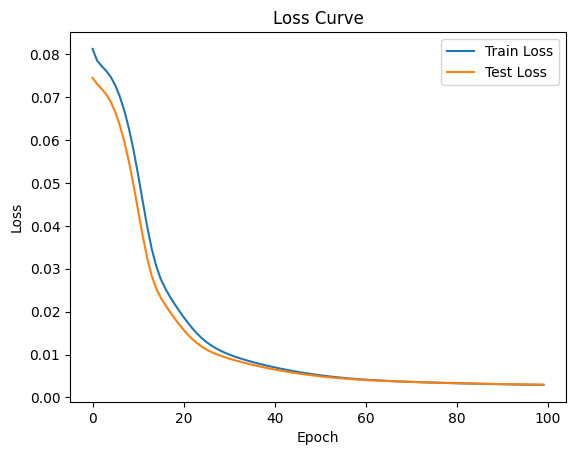

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Train Loss")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
X_tilde = autoencodeur.predict(x=X)
norm_predict = np.linalg.norm(X - X_tilde, axis=0)
top_5_predict = np.argsort(norm_predict)[:5]
X_denorm = X*(X_max - X_min) + X_min
X_top_5 = X_denorm[:, top_5_predict]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


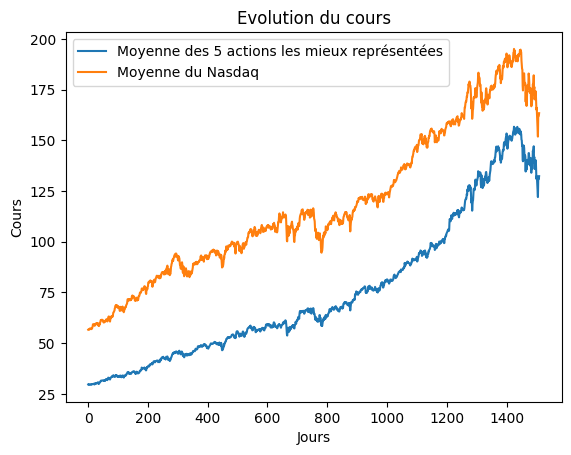

In [12]:
plt.plot(range(len(X_top_5)), np.mean(X_top_5, axis=1), label="Moyenne des 5 actions les mieux représentées")
plt.plot(range(len(X_top_5)), np.mean(X_denorm, axis=1), label="Moyenne du Nasdaq")
plt.title("Evolution du cours")
plt.xlabel("Jours")
plt.ylabel("Cours")
plt.legend()
plt.show()